# Example

Apply linear fragmenting function to compounds from [ChEMBL 25](https://www.ebi.ac.uk/chembl/).

In [1]:
# defining library
from chemgrater import fragmentor as F
# default python
from pprint import pprint
# library
from rdkit import Chem
from rdkit.Chem.Draw import DrawingOptions

In [2]:
filename='../data/compounds.chembl25.1000.smi_id' # the data curated from ChEMBL 25 database.

with open(filename, 'r') as f:
    smiles = [line.split(' ')[0] for line in f.readlines()]


c:\users\shojiro_shibayama\miniconda3\envs\cheminfo\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:172: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn("Truncating the list of molecules to be displayed to %d. Change the maxMols value to display more."%(maxMols))


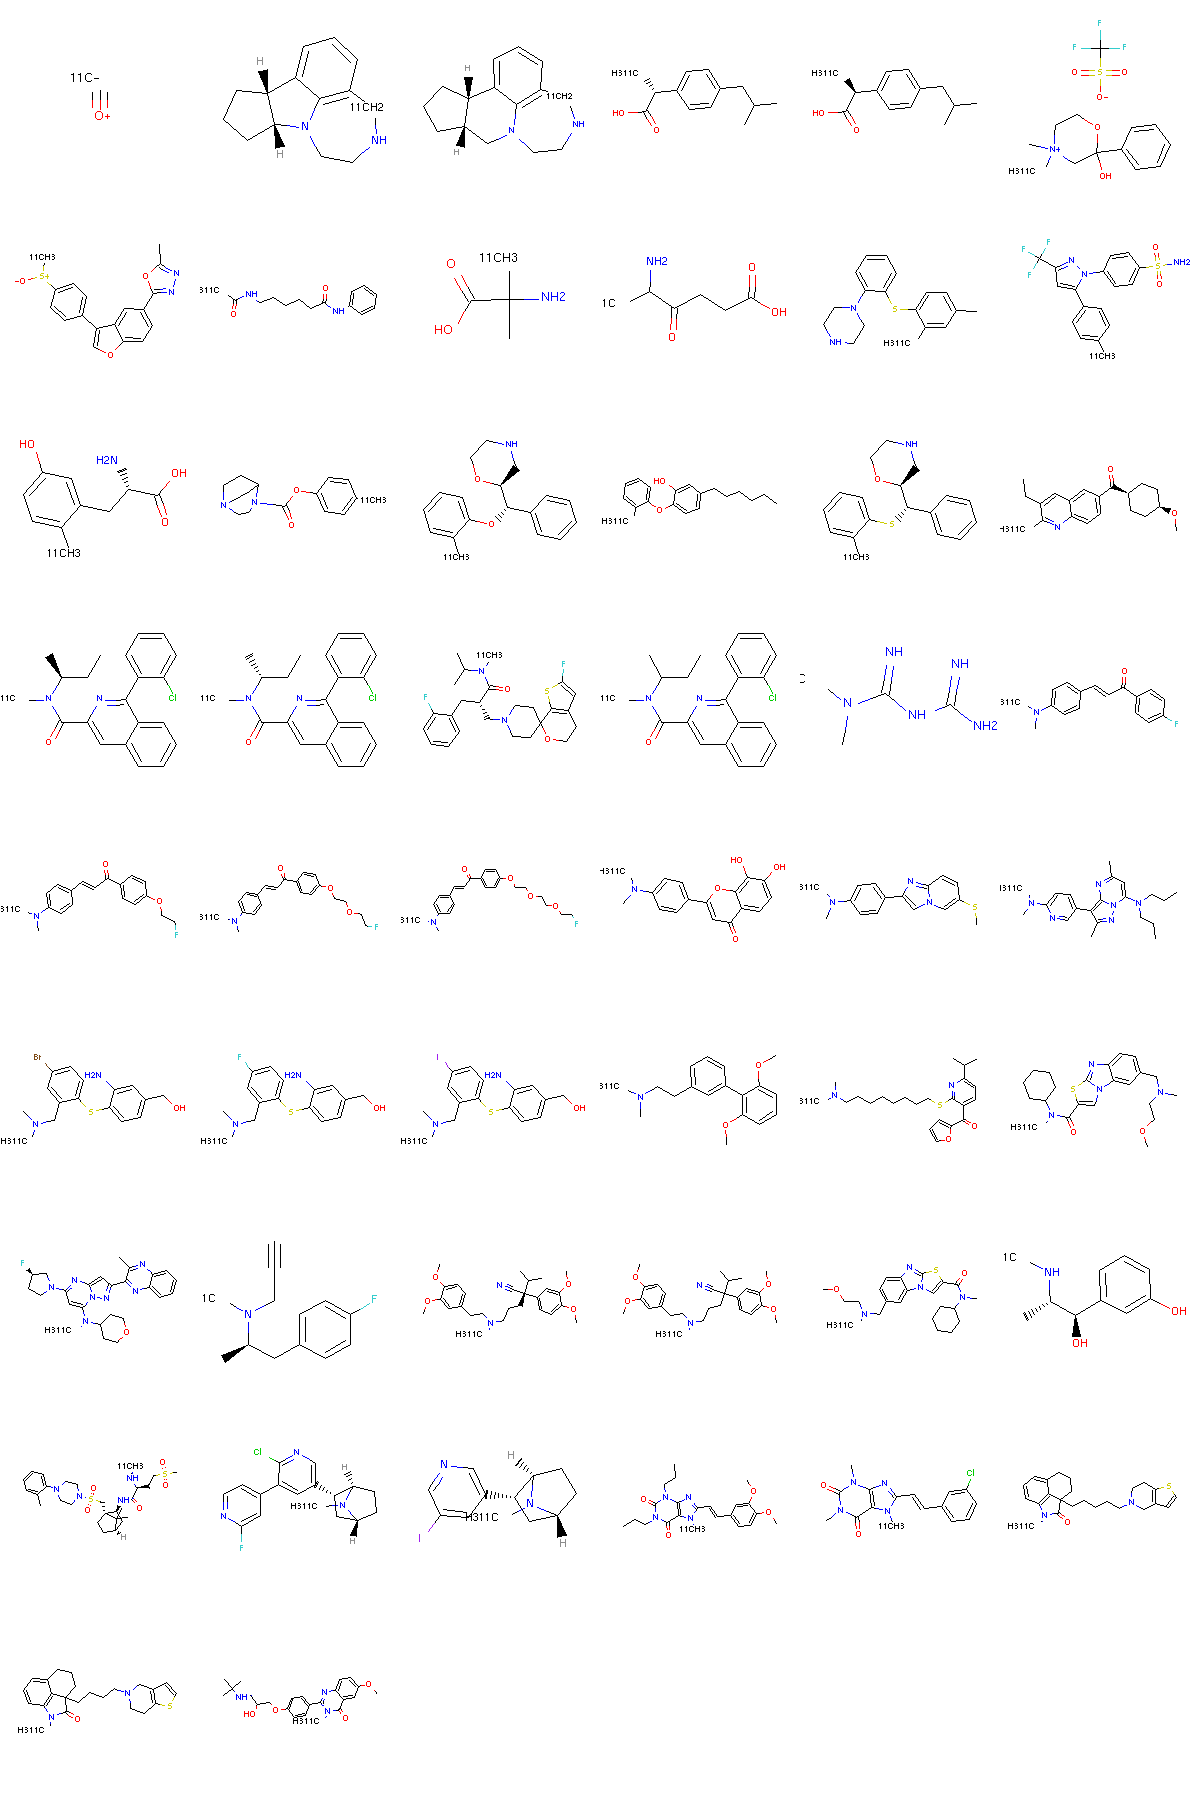

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
Draw.MolsToGridImage([Chem.MolFromSmiles(s)for s in smiles[:100]], molsPerRow=6)


In [4]:
record = []
atom_indices = []
for ix, smi in enumerate(smiles):
    try:
        mol = Chem.MolFromSmiles(smi)
    except:
        mol = MolFromSmiles(smi, sanitize=False)
        mol.UpdatePropertyCache()
        FastFindRings(mol)
    smis, atom_ixs = F.generate_linear_fragments(mol, 3)
    record += [smis]
    atom_indices += [atom_ixs]

In [5]:
print('The number of linear fragments in a molecule is:', len(record[-1]))

The number of linear fragments in a molecule is: 66


In [6]:
record[-1][:10]

['C-C-C-C',
 'C-C-C-C',
 'C-C-C-C',
 'C-C-C-C',
 'C-C-C-C',
 'C-C-C-C',
 'C-C-C-O',
 'C-C-O-C',
 'C-O-C=O',
 'C-O-C-C']

In [7]:
atom_indices[-1][:10] # corresponding atom indices

[[3, 4, 5, 6],
 [4, 5, 6, 7],
 [5, 6, 7, 8],
 [6, 7, 8, 9],
 [7, 8, 9, 10],
 [8, 9, 10, 11],
 [9, 10, 11, 12],
 [10, 11, 12, 13],
 [11, 12, 13, 14],
 [11, 12, 13, 15]]

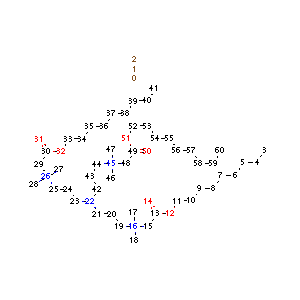

In [8]:
def show_mol(m):
    """
    visualize atom indices of a molecule
    """
    DrawingOptions.includeAtomNumbers=True
    view= Chem.Draw.MolToImage(m)
    DrawingOptions.includeAtomNumbers=False
    return view

show_mol(mol) # can check the atom indices above are correct

In [9]:
print('the number of molecules that have sevral linear fragments with the length', len([c for c in record if len(c)>0]))

the number of molecules that have sevral linear fragments with the length 969
